In [ ]:
#importing packages
from google.colab import drive

drive.mount("/content/drive")
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report
plt.style.use('ggplot')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/creditcard.csv"
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [ ]:
#peek at data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138402,82636.0,-0.765521,-0.967676,0.987614,-2.618462,0.185485,-0.363329,-0.656452,-0.015522,-2.377760,...,0.055636,0.558213,-0.448455,-0.796289,-0.026501,-0.157744,0.115765,0.072877,36.98,0
244895,152532.0,1.881846,-0.196888,-1.716300,0.433601,0.413347,-0.317374,0.053302,-0.177711,0.588330,...,-0.085310,-0.257061,0.090531,0.130264,-0.164196,0.390566,-0.049197,-0.007314,100.97,0
231375,146736.0,1.429320,-1.820735,-2.970131,-0.259455,-0.133320,-1.012743,0.859051,-0.472540,-1.206610,...,0.171145,0.048892,-0.401651,0.808670,0.276431,0.926162,-0.219562,-0.027391,418.00,0
151527,95638.0,2.024317,-0.123665,-0.758445,0.928087,0.118678,0.007327,-0.222683,-0.152101,2.399865,...,-0.527732,-0.853699,0.310932,0.582670,-0.110388,0.035110,-0.052519,-0.058175,0.01,0
138017,82445.0,-0.556492,0.635530,1.417950,-0.957858,0.192277,-0.427618,0.660662,0.003671,-0.034682,...,0.147370,0.668569,-0.427019,0.288695,0.634895,-0.371625,0.117377,0.060272,2.59,0


In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


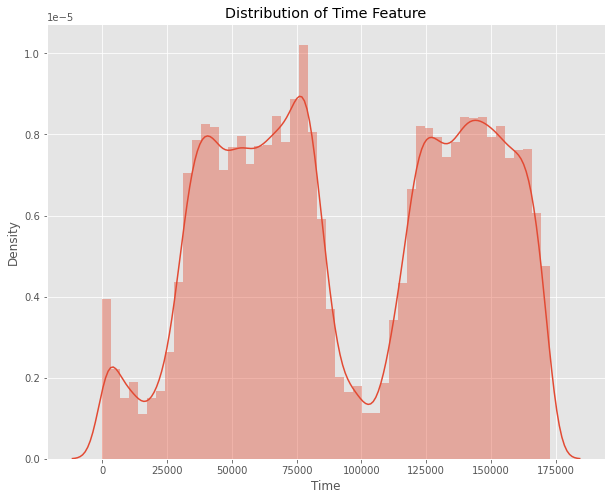

In [ ]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


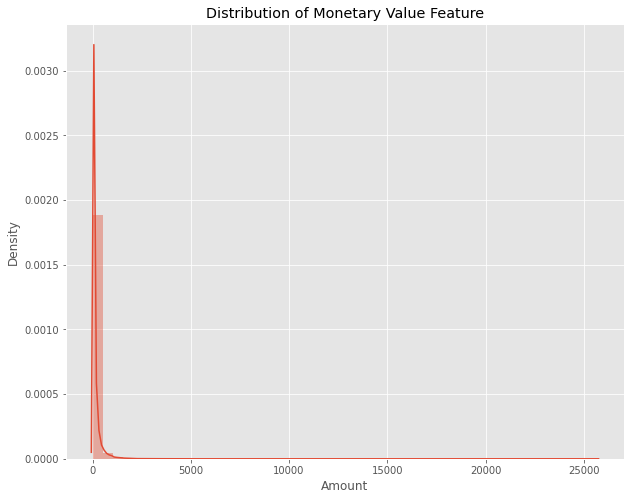

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [ ]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

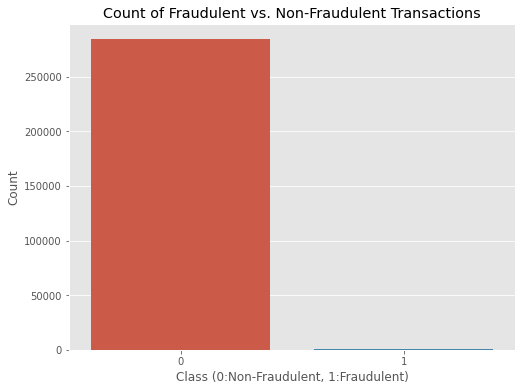

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [ ]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.136e-16,-1.228e-15,-9.215e-16,1.813e-17,-6.507e-16,-1.005e-15,-2.434e-16,-1.514e-16,...,-2.457e-16,-4.291e-16,6.169e-16,-4.425e-17,-9.606e-16,-1.581e-17,1.198e-16,2.083e-15,-2.277e-01,-1.013e-01
V2,-0.011,4.136e-16,1.000e+00,3.244e-16,-1.121e-15,5.158e-16,2.787e-16,2.056e-16,-5.377e-17,1.978e-17,...,-8.480e-17,1.526e-16,1.634e-16,1.248e-17,-4.479e-16,2.057e-16,-4.967e-16,-5.094e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.228e-15,3.244e-16,1.000e+00,4.711e-16,-6.539e-17,1.628e-15,4.895e-16,-1.269e-15,5.568e-16,...,5.706e-17,-1.134e-15,-4.983e-16,2.687e-19,-1.105e-15,-1.238e-16,1.046e-15,9.776e-16,-2.109e-01,-1.930e-01
V4,-0.105,-9.215e-16,-1.121e-15,4.711e-16,1.000e+00,-1.720e-15,-7.492e-16,-4.105e-16,5.697e-16,6.923e-16,...,-1.950e-16,-6.276e-17,9.164e-17,1.585e-16,6.071e-16,-4.247e-16,3.977e-17,-2.761e-18,9.873e-02,1.334e-01
V5,0.173,1.813e-17,5.158e-16,-6.539e-17,-1.720e-15,1.000e+00,2.408e-16,2.716e-16,7.437e-16,7.392e-16,...,-3.921e-16,1.254e-16,-8.429e-18,-1.149e-15,4.809e-16,4.320e-16,6.590e-16,-5.614e-18,-3.864e-01,-9.497e-02
V6,-0.063,-6.507e-16,2.787e-16,1.628e-15,-7.492e-16,2.408e-16,1.000e+00,1.192e-16,-1.104e-16,4.131e-16,...,5.833e-17,-4.705e-19,1.047e-16,-1.072e-15,4.563e-16,-1.357e-16,-4.452e-16,2.595e-16,2.160e-01,-4.364e-02
V7,0.085,-1.005e-15,2.056e-16,4.895e-16,-4.105e-16,2.716e-16,1.192e-16,1.000e+00,3.344e-16,1.123e-15,...,-2.028e-16,-8.899e-16,-4.387e-16,7.435e-18,-3.094e-16,-9.658e-16,-1.782e-15,-2.777e-16,3.973e-01,-1.873e-01
V8,-0.037,-2.434e-16,-5.377e-17,-1.269e-15,5.697e-16,7.437e-16,-1.104e-16,3.344e-16,1.000e+00,4.356e-16,...,3.893e-16,2.027e-16,6.377e-17,-1.047e-16,-4.653e-16,-1.727e-16,1.300e-16,-6.201e-16,-1.031e-01,1.988e-02
V9,-0.009,-1.514e-16,1.978e-17,5.568e-16,6.923e-16,7.392e-16,4.131e-16,1.123e-15,4.356e-16,1.000e+00,...,1.937e-16,-7.072e-16,-5.214e-16,-1.430e-16,6.758e-16,-7.889e-16,-6.710e-17,1.111e-15,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

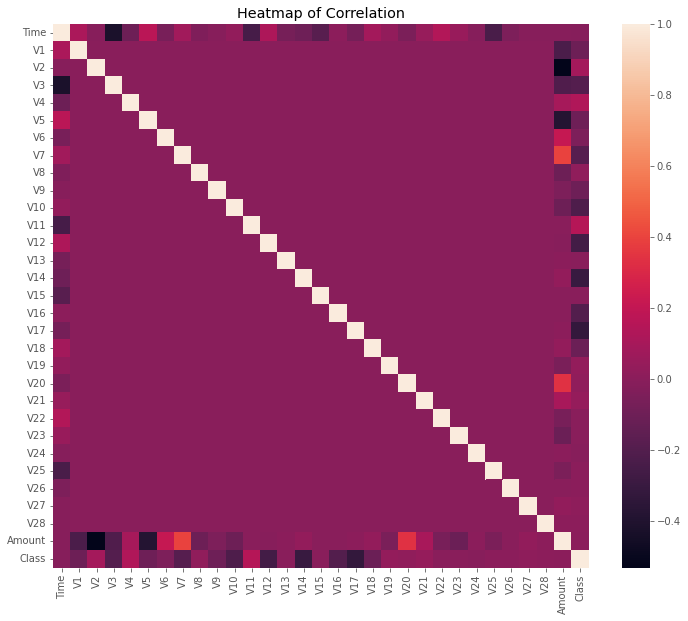

In [ ]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [ ]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

In [ ]:
df=df[["Time","Amount","Class"]]

**Scaling Amount and Time**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [ ]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [ ]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,Amount,Class,scaled_amount,scaled_time
92507,63964.0,286.87,0,0.794,-0.650
243027,151759.0,15.13,0,-0.293,1.199
206727,136339.0,252.21,0,0.655,0.874
190485,128856.0,18.95,0,-0.277,0.717
229116,145802.0,12.95,0,-0.301,1.074


In [ ]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [ ]:
df.sample(100)

,Class,scaled_amount,scaled_time
77379,0,-0.238,-0.796
78637,0,0.103,-0.783
63418,0,0.570,-0.929
97876,0,-0.320,-0.598
85216,0,-0.293,-0.719
...,...,...,...
183803,0,-0.335,0.656
128576,0,-0.348,-0.338
138119,0,-0.313,-0.259
173019,0,0.880,0.558


In [ ]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legit.value_counts())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~`')
print(fraud.value_counts())

Class  scaled_amount  scaled_time
0      -0.347          1.439         18
       -0.323          1.439         18
       -0.333         -1.577         13
                      -1.577         10
       -0.350         -1.088          9
                                     ..
       -0.313         -0.610          1
                      -0.609          1
                      -0.605          1
                      -0.604          1
        102.362        1.503          1
Length: 279477, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~`
Class  scaled_amount  scaled_time
1      -0.349         -0.560         6
                      -0.010         4
        0.063         -0.020         2
        0.910         -0.020         2
       -0.041         -0.020         2
                                    ..
       -0.349          0.322         1
                       0.164         1
                       0.129         1
                       0.115         1
        8.146          

In [ ]:
legit.head()

,Class,scaled_amount,scaled_time
0,0,0.245,-1.997
1,0,-0.342,-1.997
2,0,1.161,-1.997
3,0,0.141,-1.997
4,0,-0.073,-1.997


In [ ]:
fraud.head()

,Class,scaled_amount,scaled_time
541,1,-0.353,-1.988
623,1,1.762,-1.987
4920,1,0.606,-1.903
6108,1,-0.117,-1.849
6329,1,-0.349,-1.838


In [ ]:
df.groupby('Class').mean()

,scaled_amount,scaled_time
Class,,
0,-2.343e-04,5.126e-04
1,1.354e-01,-2.962e-01


In [ ]:
## Under Sampling
legit_sample = legit.sample(n=1069)


In [ ]:
df3=df
df2 = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
df2.head()

,Class,scaled_amount,scaled_time
276069,0,-0.316,1.518
269728,0,-0.233,1.452
73528,0,0.520,-0.835
102964,0,-0.110,-0.555
156415,0,-0.350,0.279


In [ ]:
df2['Class'].value_counts()

0    1069
1     492
Name: Class, dtype: int64

In [ ]:
X = df2.drop(columns='Class', axis=1)
Y = df2['Class']

In [ ]:
X1 = df3.drop(columns='Class', axis=1)
Y1 = df3['Class']

In [ ]:
print(X)

        scaled_amount  scaled_time
276069         -0.316        1.518
269728         -0.233        1.452
73528           0.520       -0.835
102964         -0.110       -0.555
156415         -0.350        0.279
...               ...          ...
279863          1.206        1.565
280143         -0.350        1.570
280149         -0.042        1.570
281144          0.626        1.583
281674         -0.183        1.591

[1561 rows x 2 columns]


In [ ]:
print(Y)

276069    0
269728    0
73528     0
102964    0
156415    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 1561, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)
print(X_train)

(1561, 2) (1248, 2) (313, 2)
        scaled_amount  scaled_time
95893          -0.345       -0.617
9242           -0.321       -1.716
189399         -0.229        0.707
146038         -0.220       -0.156
80040          -0.349       -0.769
...               ...          ...
141260          1.695       -0.223
91860          -0.080       -0.656
229506         -0.223        1.077
88897          -0.349       -0.684
6774           -0.349       -1.817

[1248 rows x 2 columns]


In [ ]:
Algos=[]
MSE_Scors=[]
R2_Scors=[]
Accuracy=[]


In [ ]:
## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Algos.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [ ]:
MSE_Scors.append(mean_squared_error(Y_test, predicted))
R2_Scors.append(r2_score(Y_test, predicted))

In [ ]:
#SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Fitting SVR to the Training Set
Algos.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [ ]:
# Appending the Scores For Visualisation at a Later Part
MSE_Scors.append(mean_squared_error(Y_test, predicted))
R2_Scors.append(r2_score(Y_test, predicted))

In [ ]:
### XGB ###

In [ ]:
import xgboost as xgb

In [ ]:
# Fitting XGBoost Regressor to the Training Set
Algos.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

[19:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Appending the Scores For Visualisation at a Later Part
MSE_Scors.append(mean_squared_error(Y_test, predicted))
R2_Scors.append(r2_score(Y_test, predicted))

In [ ]:
### Logistic Regression ###

In [ ]:
Algos.append("Logistic Regression")
clf = LogisticRegression()
# training the Logistic Regression Model with Training Data
clf.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
Accuracy.append("")
Accuracy.append("")
Accuracy.append("")
Accuracy.append(training_data_accuracy)

In [ ]:
# Appending the Scores For Visualisation at a Later Part
MSE_Scors.append('_')
R2_Scors.append('_')

In [ ]:
### Scorecard of different models in a single dataframe ###
pd.DataFrame(list(zip(Algos, MSE_Scors, R2_Scors, Accuracy)), columns = ['Algorithm', 'MSE_Score', 'R2_Score',"Accuracy"])

,Algorithm,MSE_Score,R2_Score,Accuracy
0,Linear Regression,0.215,0.008,
1,Support Vector Regression,0.254,-0.174,
2,XGB Regressor,0.163,0.246,
3,Logistic Regression,_,_,0.683


By using above classification algorithms we observe that the above mentioned algos are biased towards majority class.


RANDOM FOREST CLASSIFIER (provides the best accuracy than above)

In [ ]:
  clf = RandomForestClassifier(n_estimators=75, random_state=0, n_jobs=-1)
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  print('Accuracy: ', accuracy_score(Y_test, y_pred))

Accuracy:  0.7955271565495208


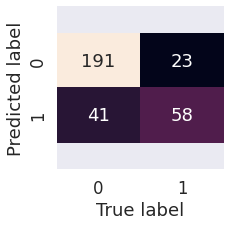

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False ,fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(Y_test, y_pred)

In [ ]:
## Over Sampling(SMOTE)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, stratify=Y1, random_state=2)

In [ ]:
print(X1.shape, x_train.shape, x_test.shape)
print(x_train)

(284807, 2) (227845, 2) (56962, 2)
        scaled_amount  scaled_time
243389          0.024        1.202
67696          -0.163       -0.888
196292          0.137        0.771
21615          -0.346       -1.328
145241         -0.276       -0.170
...               ...          ...
69742           0.255       -0.869
6242           -0.232       -1.843
235303         -0.342        1.127
263726         -0.343        1.396
237636         -0.345        1.148

[227845 rows x 2 columns]


In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [ ]:
os=SMOTETomek(0.15)
X_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.15 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of classes before fit Counter({0: 227451, 1: 394})
The number of classes after fit Counter({0: 223393, 1: 30059})


In [ ]:
  clf = RandomForestClassifier(n_estimators=112, random_state=11, n_jobs=-1)
  clf.fit(X_train_ns,y_train_ns)
  y_pred = clf.predict(x_test)
  print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9793546574909588


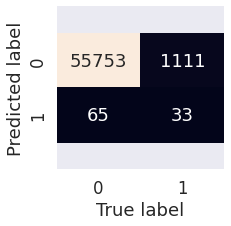

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False ,fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

In [ ]:
print("Final accuracy: {}".format(accuracy_score(y_test,y_pred)))

Final accuracy: 0.9793546574909588
